In [203]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [204]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

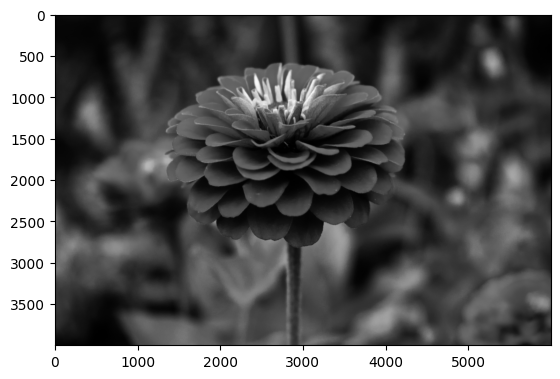

In [205]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

# 1. Зашумление изображения при помощи шума Гаусса, постоянного шума.

1.1 Шум Гаусса

In [206]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  61, 108, ...,   0, 128, 124],
       [  0,  34, 106, ..., 102,  22,  83],
       [ 50,   0,   0, ...,   0,  41,   0],
       ...,
       [  0,   0,   0, ...,  85, 255,  43],
       [  0,   0,   0, ...,   0,  40, 243],
       [  0,  32,  31, ...,   0,   0,  60]],
      shape=(4000, 6000), dtype=uint8)

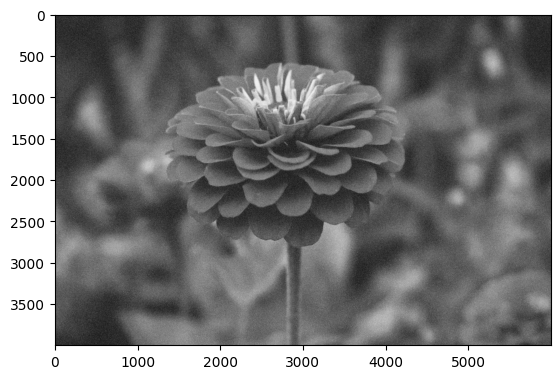

In [207]:
image_noise_gauss = image_gray.astype(np.float32) + noise_gauss
image_noise_gauss = np.clip(image_noise_gauss, 0, 255).astype(np.uint8)
plt.imshow(image_noise_gauss, cmap="gray")

1.2 Постоянный шум

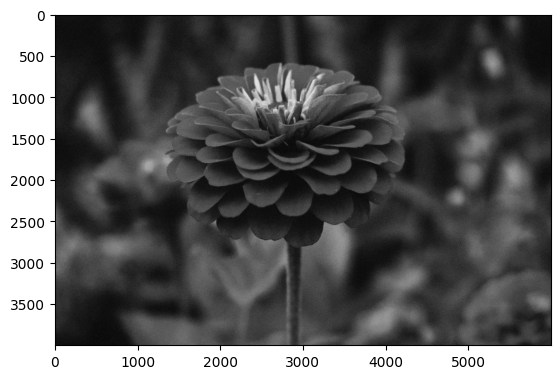

In [208]:
a = -50  
b = 50   
uniform_noise = np.random.uniform(a, b, image_gray.shape) 
uniform_noisy_image = image_gray.astype(np.float32) + uniform_noise
uniform_noisy_image = np.clip(uniform_noisy_image, 0, 255).astype(np.uint8)
plt.imshow(uniform_noisy_image, cmap="gray")

# 2. Тестирование медианного фильтра, фильтра гаусса, билатериального фильтра, фильтра нелокальных средних с различными параметрами.

2.1 Медианный фильтр

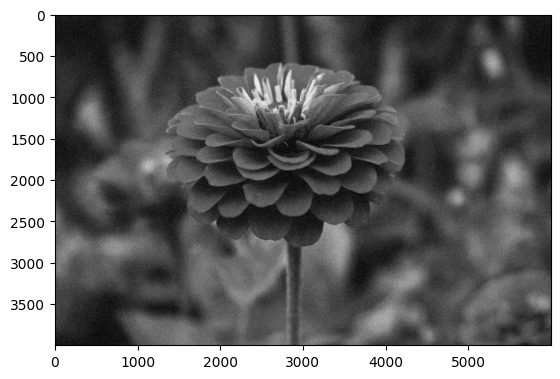

In [209]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)
plt.imshow(image_gauss_median, cmap="gray")

2.2 Фильтр Гаусса

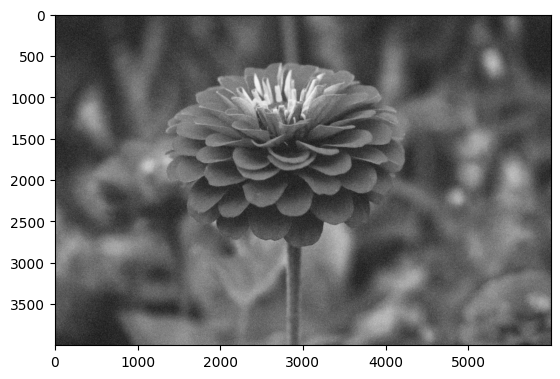

In [210]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)
plt.imshow(image_gauss_gauss, cmap="gray")

2.3 Билатериальный фильтр

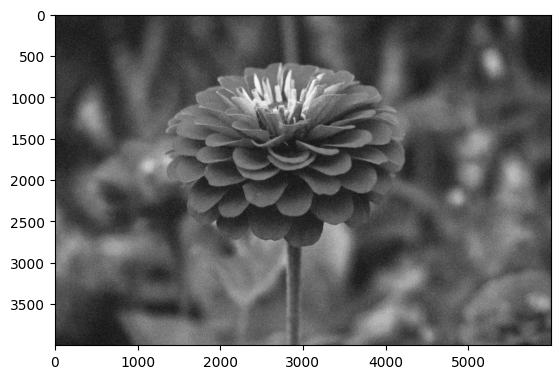

In [211]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)
plt.imshow(image_gauss_bilat, cmap="gray")

2.4 Фильтр нелокальных средних

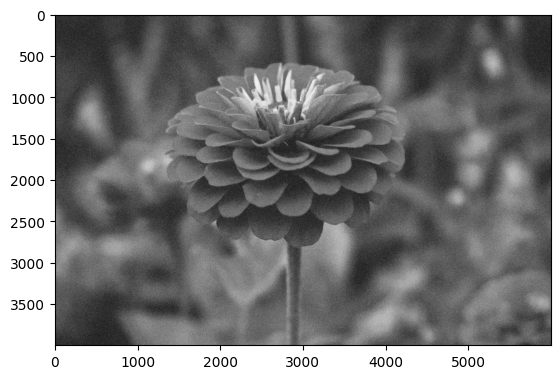

In [212]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
plt.imshow(image_gauss_nlm, cmap="gray")

# 3 Выяснение, какой фильтр показал лучший результат фильтрации шума.

In [213]:
filters = [
    ('Median', image_gauss_median),
    ('Gaussian', image_gauss_gauss),
    ('Bilateral', image_gauss_bilat), 
    ('NLM', image_gauss_nlm)
]

metrics = {}
for name, filtered_img in filters:
    mse = mean_squared_error(image_gray, filtered_img)
    ssim = structural_similarity(image_gray, filtered_img, data_range=255)
    metrics[name] = {'MSE': mse, 'SSIM': ssim, 'image': filtered_img}


best_mse_name = min(metrics.items(), key=lambda x: x[1]['MSE'])[0]
best_ssim_name = max(metrics.items(), key=lambda x: x[1]['SSIM'])[0]

print(f"Лучший по MSE: {best_mse_name}")
print(f"Лучший по SSIM: {best_ssim_name}")

Лучший по MSE: Median
Лучший по SSIM: Gaussian
